# ECSE 551 Assignment 1

In [1]:
from google.colab import drive

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from numpy import linalg as LA
from time import time
from google.colab import files 

drive.mount('/content/gdrive')

path = "./gdrive/MyDrive/ECSE_551_Assignment_1/Data/"

Mounted at /content/gdrive


## Loading data

In [2]:
df_d = pd.read_csv(path + '/diabetes.csv', header=None)
df_d = df_d.sample(frac=1, random_state=0).reset_index(drop=True) #shuffle df_d

df_rw = pd.read_csv(path + 'red_wine.csv', header=None)
df_rw = df_rw.sample(frac=1, random_state=0).reset_index(drop=True)   #shuffle df_d

In [3]:
df_d.head()

,0,1,2,3,4,5,6,7,8
0,0.00000,0.51256,0.42623,0.00000,0.000000,0.37407,0.00000,0.00000,0
1,0.17647,0.91457,0.60656,0.00000,0.000000,0.45455,0.11401,0.13333,1
2,0.17647,0.40201,0.67213,0.31313,0.082742,0.50969,0.51836,0.10000,1
3,0.47059,0.47739,0.59016,0.00000,0.000000,0.54844,0.17378,0.60000,0
4,0.17647,0.66332,0.65574,0.00000,0.000000,0.51267,0.13834,0.38333,1


In [4]:
df_rw.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.49558,0.37671,0.39,0.068493,0.070117,0.070423,0.038869,0.55246,0.33858,0.083832,0.24615,0
1,0.25664,0.36301,0.18,0.417810,0.126880,0.366200,0.310950,0.66618,0.50394,0.263470,0.15385,0
2,0.28319,0.21918,0.28,0.123290,0.146910,0.239440,0.314490,0.47909,0.37795,0.203590,0.15385,0
3,0.46018,0.15068,0.39,0.034247,0.090150,0.028169,0.003534,0.33969,0.35433,0.131740,0.46154,1
4,0.23894,0.17808,0.21,0.075342,0.113520,0.084507,0.102470,0.44241,0.46457,0.083832,0.16923,0


In [5]:
df_d.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPF', 'Age', 'Outcome']
df_d.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPF,Age,Outcome
0,0.00000,0.51256,0.42623,0.00000,0.000000,0.37407,0.00000,0.00000,0
1,0.17647,0.91457,0.60656,0.00000,0.000000,0.45455,0.11401,0.13333,1
2,0.17647,0.40201,0.67213,0.31313,0.082742,0.50969,0.51836,0.10000,1
3,0.47059,0.47739,0.59016,0.00000,0.000000,0.54844,0.17378,0.60000,0
4,0.17647,0.66332,0.65574,0.00000,0.000000,0.51267,0.13834,0.38333,1


In [6]:
df_rw.columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_SO2', 'total_SO2', 'density', 'pH', 'sulphates', 'alcohol', 'Output']
df_rw.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_SO2,total_SO2,density,pH,sulphates,alcohol,Output
0,0.49558,0.37671,0.39,0.068493,0.070117,0.070423,0.038869,0.55246,0.33858,0.083832,0.24615,0
1,0.25664,0.36301,0.18,0.417810,0.126880,0.366200,0.310950,0.66618,0.50394,0.263470,0.15385,0
2,0.28319,0.21918,0.28,0.123290,0.146910,0.239440,0.314490,0.47909,0.37795,0.203590,0.15385,0
3,0.46018,0.15068,0.39,0.034247,0.090150,0.028169,0.003534,0.33969,0.35433,0.131740,0.46154,1
4,0.23894,0.17808,0.21,0.075342,0.113520,0.084507,0.102470,0.44241,0.46457,0.083832,0.16923,0


##Data Analysis

In [7]:
print("diabetes sample size = " + str(len(df_d.index)))
print("red wine sample size = " + str(len(df_rw.index)))

diabetes sample size = 600
red wine sample size = 1599


In [8]:
df_d['Outcome'].value_counts()

0    332
1    268
Name: Outcome, dtype: int64

Diabetes correlation heat matrix

In [9]:
df_rw['Output'].value_counts()

1    855
0    744
Name: Output, dtype: int64

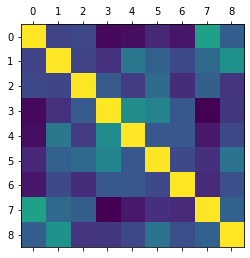

In [10]:
plt.matshow(df_d.corr())
plt.show()

Red Wine correlation heat matrix

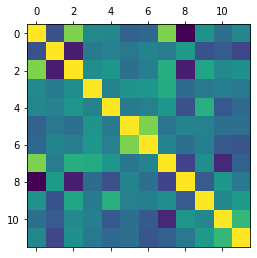

In [11]:
plt.matshow(df_rw.corr())
plt.show()

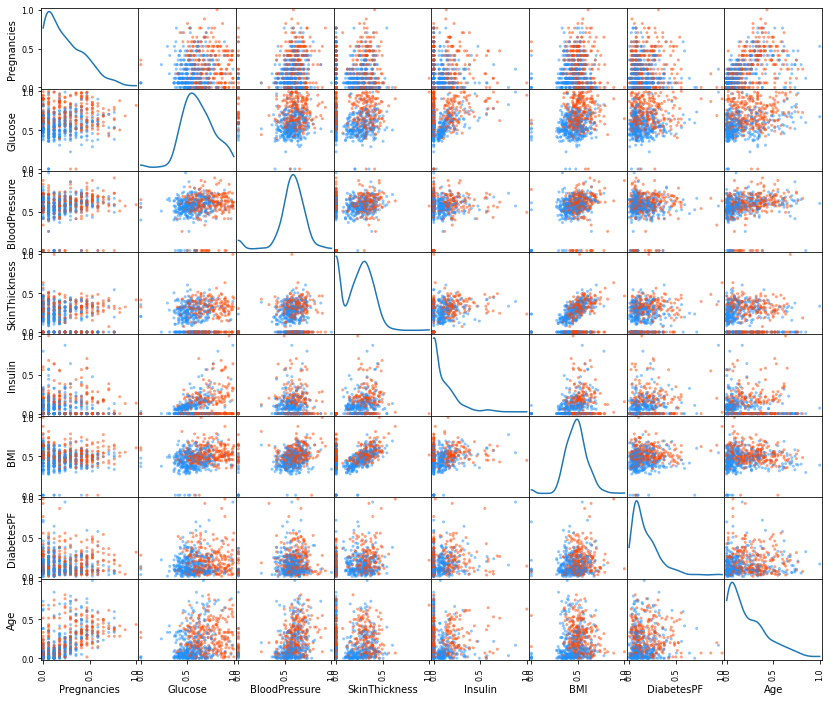

In [12]:
color = ['dodgerblue', 'orangered']
colors = df_d['Outcome'].map(lambda x: color[x])
pd.plotting.scatter_matrix(df_d.iloc[:,:-1], figsize= (14, 12), diagonal='kde', color=colors);

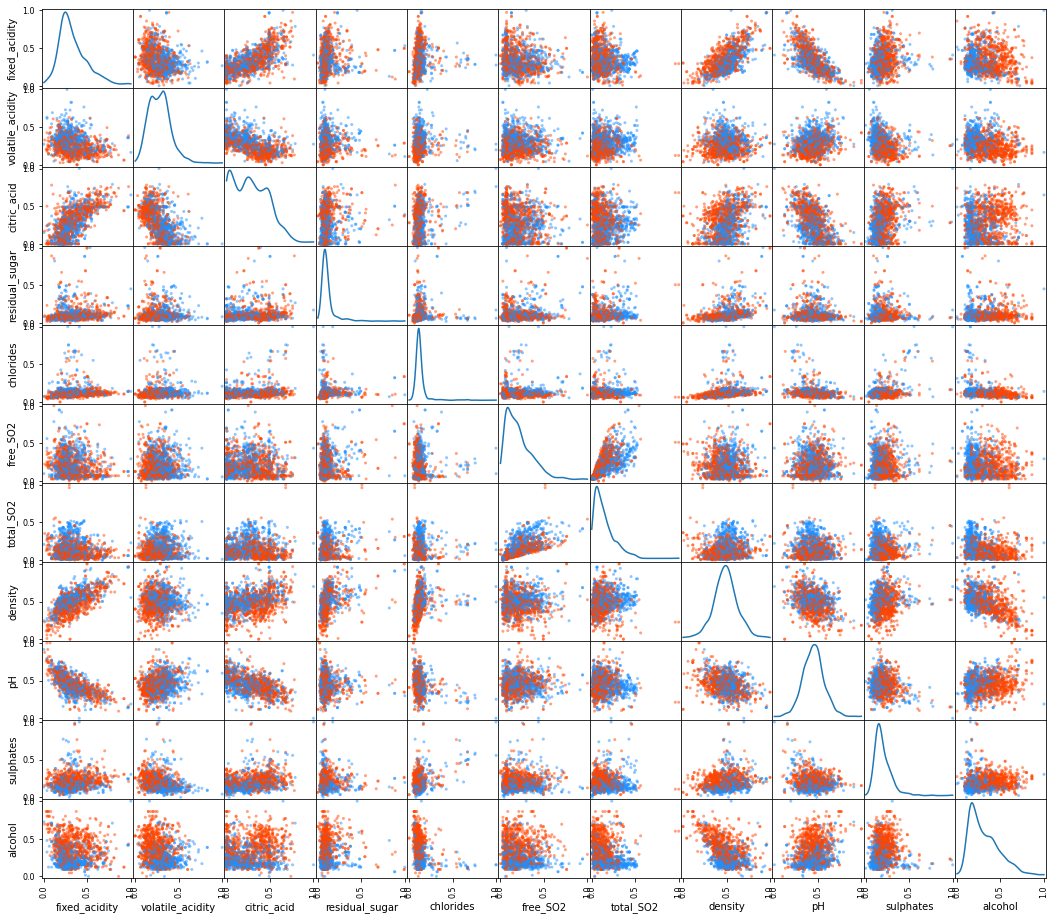

In [13]:
color = ['dodgerblue', 'orangered']
colors = df_rw['Output'].map(lambda x: color[x])
pd.plotting.scatter_matrix(df_rw.iloc[:,:-1], figsize= (18, 16), diagonal='kde', color=colors);

## Preprocessing

In [14]:
# convert to numpy
np_d = df_d.to_numpy()
np_rw = df_rw.to_numpy()

# Get feature set and label set
X_train_d = np_d[:,:-1]
Y_d = np_d[:,-1]

X_train_rw = np_rw[:,:-1]
Y_rw = np_rw[:,-1]

## Model

In [15]:
class Logistic_Regression_Model:
  def __init__(self):
    # weight vector
    self.w = None # Type: np.array 

  def calculate_loss(self, w, X, y):
    n = X.shape[0]
    loss = 0
    for i in range(n):
      y_pred = self.sigmoid(np.matmul(w, X[i]))
      loss -= y[i] * np.log(y_pred) + (1 - y[i]) * np.log(1 - y_pred)
    return loss

  def fit(self, X , y, alpha_k, epsilon = 0, max_iter = float("inf"), compute_loss = False, verbose = False):
    if compute_loss: loss_list = []
    
    # Get the dimensions of X
    n, m = X.shape 
    
    # Generate and append bias column
    bias = np.ones((n,1), dtype=np.double)
    X = np.append(X, bias, axis = 1)
    
    # Initialize w as all 0s
    w = np.zeros(m+1) # dimension 1*(m+1)

    # Gradient Descent
    k = 0                     # number of iterations
    l2_norm = float("inf")    # initial error is infinity  
    if verbose: print("L2-Norm of w:")
    while(l2_norm > epsilon and k < max_iter):
      delta = np.zeros(m+1)
  
      for i in range(n):
        y_pred = self.sigmoid(np.matmul(w, X[i])) # 1D matmul is dot product 
        delta -= X[i] * (y[i] - y_pred)

      new_w = w - alpha_k * delta
      
      l2_norm = LA.norm(new_w - w) ** 2
      
      # Print norm for every 100 iterations
      if k % 100 == 0: 
        if verbose:
          print("Iteration " + str(k) + ": " + str(l2_norm))
        if compute_loss:
          loss = self.calculate_loss(w, X, y);
          loss_list.append((k, loss))

      w = new_w
      k += 1
    
    self.w = w
    if compute_loss: return np.array(loss_list)
    
  def predict(self, X):
    predicted = []
    
    bias = np.ones((X.shape[0],1), dtype=np.double)
    X = np.append(X,bias, axis=1)
    for x in X:
      if(self.sigmoid(np.matmul(self.w, x)) >= 0.5):
        predicted.append(1)
      else: 
        predicted.append(0)

    return np.array(predicted)

  def sigmoid(self, x):
    return 1 / (1 + np.exp(-x))

## Preliminary Experimention

### Diabetes

In [ ]:
model = Logistic_Regression_Model()
model.fit(X_train_d, Y_d, alpha_k=1/X_train_d.shape[0], epsilon=0.0000001, max_iter=15000, verbose=True)

In [18]:
print("Our model weights: ")
print(model.w)

Our model weights: 
None


#### learning rate

In [ ]:
n = X_train_d.shape[0]
learning_rates = [1/100, 1/n, 1/(10 * n), 1/ (100 * n)]
loss_data_lists = []

for learning_rate in learning_rates:
  model = Logistic_Regression_Model()
  loss_data = model.fit(X_train_d, Y_d, epsilon=0, alpha_k=learning_rate, max_iter=10000, compute_loss=True, verbose=True)
  loss_data_lists.append(loss_data)

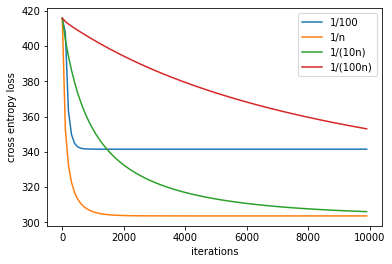

In [ ]:
for loss_data in loss_data_lists:
  plt.plot(loss_data[:,0], loss_data[:,1])
plt.legend(["1/100", "1/n", "1/(10n)", "1/(100n)"])
plt.xlabel('iterations')
plt.ylabel('cross entropy loss')
plt.show()

#### Epsilon

In [ ]:
epsilons = [0.01, 0.0001, 0.000001, 0.00000001, 0.0000000001, 0.000000000001]
running_time_list = []

model = Logistic_Regression_Model()

for epsilon in epsilons:
  start = time()
  model.fit(X_train_d, Y_d, epsilon=epsilon, alpha_k=1/X_train_d.shape[0], verbose=True)
  end = time()

  running_time_list.append(end - start)

In [ ]:
print(running_time_list)

[0.010504961013793945, 1.6250784397125244, 8.97813630104065, 18.801599740982056, 29.121767282485962]


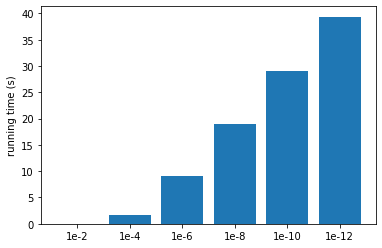

In [ ]:
plt.bar(['1e-2', '1e-4', '1e-6', '1e-8', '1e-10', '1e-12'],running_time_list)
plt.ylabel('running time (s)')
plt.show()

### Red Wine

In [ ]:
model = Logistic_Regression_Model()
model.fit(X_train_rw, Y_rw, alpha_k=1/X_train_rw.shape[0], epsilon=0.0000001, max_iter=15000, verbose=True)

L2-Norm of w:
Iteration 0: 0.005107145973960234
Iteration 100: 0.00046913833868591695
Iteration 200: 0.00016386204826361676
Iteration 300: 8.013322717925636e-05
Iteration 400: 4.7641867875033395e-05
Iteration 500: 3.16861093398087e-05
Iteration 600: 2.2453075498059183e-05
Iteration 700: 1.649864505206424e-05
Iteration 800: 1.2390400973491064e-05
Iteration 900: 9.43726592788547e-06
Iteration 1000: 7.260075113248571e-06
Iteration 1100: 5.6283965767094685e-06
Iteration 1200: 4.391474341011938e-06
Iteration 1300: 3.445671143461663e-06
Iteration 1400: 2.71739814860604e-06
Iteration 1500: 2.1532696877238274e-06
Iteration 1600: 1.713974827915275e-06
Iteration 1700: 1.370244653545337e-06
Iteration 1800: 1.1000951163264977e-06
Iteration 1900: 8.86892273885787e-07
Iteration 2000: 7.179696893704874e-07
Iteration 2100: 5.836270601400137e-07
Iteration 2200: 4.7639726316190715e-07
Iteration 2300: 3.905051286600034e-07
Iteration 2400: 3.214647161159804e-07
Iteration 2500: 2.657775847945224e-07
Iterat

In [ ]:
print("Our model weights: ")
print(model.w)

Our model weights: 
[ 1.68234903 -4.79513336 -1.27912691  0.75825346 -2.0290824   1.44932776
 -4.38168937 -0.73927416 -0.29798668  4.46471322  5.65183736 -0.27402844]
Scikit learn weights: 
[[ 1.52893864 -4.79244332 -1.27457127  0.80351032 -2.34628858  1.57765565
  -4.6394164  -0.68428434 -0.48808745  4.6665035   5.63873949]]
[-0.15790576]


In [ ]:
n = X_train_rw.shape[0]
learning_rates = [1/100, 1/n, 1/(10 * n), 1/ (100 * n)]
loss_data_lists = []

for learning_rate in learning_rates:
  model = Logistic_Regression_Model()
  loss_data = model1.fit(X_train_rw, Y_rw, epsilon=0, alpha_k=learning_rate, max_iter=3000, compute_loss=True, verbose=True)
  loss_data_lists.append(loss_data)

L2-Norm of w:
Iteration 0: 1.3057955933367502
Iteration 100: 47.2234895206072
Iteration 200: 43.12396331772633
Iteration 300: 41.43170594233848
Iteration 400: 40.687403741204655
Iteration 500: 40.3530320404864
Iteration 600: 40.19955318376124
Iteration 700: 40.12732786058527
Iteration 800: 40.092240433652236
Iteration 900: 40.0744909226197
Iteration 1000: 40.065053637959444
Iteration 1100: 40.05973742105663
Iteration 1200: 40.05655191060031
Iteration 1300: 40.05452506209836
Iteration 1400: 40.05316507451747
Iteration 1500: 40.052212004614006
Iteration 1600: 40.05152122839753
Iteration 1700: 40.05100767444652
Iteration 1800: 40.050618461068886
Iteration 1900: 40.050319032005014
Iteration 2000: 40.05008584428254
Iteration 2100: 40.049902324799156
Iteration 2200: 40.04975651553593
Iteration 2300: 40.04963962899977
Iteration 2400: 40.04954511867868
Iteration 2500: 40.04946805610148
Iteration 2600: 40.049404699613774
Iteration 2700: 40.04935218838476
Iteration 2800: 40.04930832121758
Iterat

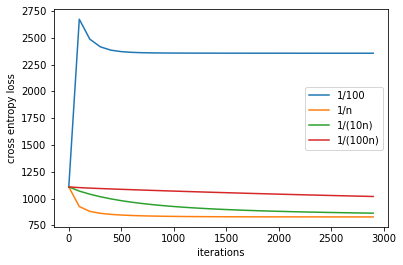

In [ ]:
for loss_data in loss_data_lists:
  plt.plot(loss_data[:,0], loss_data[:,1])
plt.legend(["1/100", "1/n", "1/(10n)", "1/(100n)"])
plt.xlabel('iterations')
plt.ylabel('cross entropy loss')
plt.show()

## Feature Engineering

In [19]:
df_d.insert(8, 'Glucose **2', '')
df_d.insert(9, 'Age **2', '')
df_d.insert(10, 'BMI **2', '')
df_d.insert(11, 'Pressure **2', '')
df_d.insert(12, 'sqrt Glucose', '')
df_d.insert(13, 'sqrt Age', '')
df_d.insert(14, 'sqrt BMI', '')
df_d.insert(15, 'sqrt Pressure', '')

df_d.insert(16,'Glucose * BMI','')
df_d.insert(17,'Glucose * DPF','')
df_d.insert(18, 'Glucose * insulin','')
df_d.insert(19,'Glucose * Age','')
df_d.insert(20,'BMI * DPF','')
df_d.insert(21,'BMI * Pressure','')
df_d.insert(22,'BMI * Age','')
df_d.insert(23,'Pressure * Age','')

In [20]:
df_d['Glucose **2'] = df_d.apply((lambda row: row.Glucose ** 2), axis=1)
df_d['Age **2'] = df_d.apply((lambda row: row.Age ** 2), axis=1)
df_d['BMI **2'] = df_d.apply((lambda row: row.BMI ** 2), axis=1)
df_d['Pressure **2'] = df_d.apply((lambda row: row.BloodPressure ** 2), axis=1)
df_d['sqrt Glucose'] = df_d.apply((lambda row: np.sqrt(row.Glucose)), axis=1)
df_d['sqrt Age'] = df_d.apply((lambda row: np.sqrt(row.Age)), axis=1)
df_d['sqrt BMI'] = df_d.apply((lambda row: np.sqrt(row.BMI)), axis=1)
df_d['sqrt Pressure'] = df_d.apply((lambda row: np.sqrt(row.BloodPressure)), axis=1)

df_d['Glucose * BMI'] = df_d.apply((lambda row: row.Glucose * row.BMI), axis=1)
df_d['Glucose * DPF'] = df_d.apply((lambda row: row.Glucose * row.DiabetesPF), axis=1)
df_d['Glucose * insulin'] = df_d.apply((lambda row: row.Glucose * row.Insulin), axis=1)
df_d['Glucose * Age'] = df_d.apply((lambda row: row.Glucose * row.Age), axis=1)
df_d['BMI * DPF'] = df_d.apply((lambda row: row.BMI * row.DiabetesPF), axis=1)
df_d['BMI * Pressure'] = df_d.apply((lambda row: row.BloodPressure * row.BMI), axis=1)
df_d['BMI * Age'] = df_d.apply((lambda row: row.BMI * row.Age), axis=1)
df_d['Pressure * Age'] = df_d.apply((lambda row: row.BloodPressure * row.Age), axis=1)

In [21]:
df_rw.insert(11, 'volatile acidity **2', '')
df_rw.insert(12, 'free SO2 **2', '')
df_rw.insert(13, 'pH **2', '')
df_rw.insert(14, 'sulphates **2', '')
df_rw.insert(15, 'sqrt volatile acidity', '')

df_rw.insert(16,'pH * volatile acidity','')
df_rw.insert(17,'pH * citric acid','')
df_rw.insert(18, 'sulphate * free SO2','')
df_rw.insert(19,'fixed * density','')

In [22]:
df_rw['volatile acidity **2'] = df_rw.apply((lambda row: row.volatile_acidity** 2), axis=1)
df_rw['free SO2 **2'] = df_rw.apply((lambda row: row.free_SO2 ** 2), axis=1)
df_rw['pH **2'] = df_rw.apply((lambda row: row.pH ** 2), axis=1)
df_rw['sulphates **2'] = df_rw.apply((lambda row: row.sulphates ** 2), axis=1)
df_rw['sqrt volatile acidity'] = df_rw.apply((lambda row: np.sqrt(row.volatile_acidity)), axis=1)

df_rw['pH * volatile acidity'] = df_rw.apply((lambda row: row.pH * row.volatile_acidity), axis=1)
df_rw['pH * citric acid'] = df_rw.apply((lambda row: row.pH * row.citric_acid), axis=1)
df_rw['sulphate * free SO2'] = df_rw.apply((lambda row: row.sulphates * row.free_SO2), axis=1)
df_rw['fixed * density'] = df_rw.apply((lambda row: row.fixed_acidity * row.density), axis=1)

In [28]:
# convert to numpy
np_d = df_d.to_numpy()
np_rw = df_rw.to_numpy()

# Get feature set and label set
X_train_d = np_d[:,:-1]
Y_d = np_d[:,-1]

X_train_rw = np_rw[:,:-1]
Y_rw = np_rw[:,-1]

## Automated Feature Selection 

Recursive Feature Elimination (RFE)

In [30]:
def RFE(model_class, X_train, Y, num_features_selected, original_X_train, i=None):

  n = X_train.shape[1] # number of features left
  print("number of feature left is " + str(n))
  m = model_class()
  m.fit(X_train, Y, alpha_k=1/X_train.shape[0], epsilon=0.0000001, max_iter=7000, verbose=True)
  
  print("weight w shape" + str(m.w.shape))
  if n <= num_features_selected:  # no features left
    print("returned!")
    print(i)
    return m, i

  i = np.argmin(np.abs(m.w[:-1])) # :-1 because we do not consider dummy (bias) term
  X_train_del = np.delete(X_train, i, 1)

  return RFE(model_class, X_train_del, Y, num_features_selected, original_X_train, i)

In [31]:
#k-fold cross, validation set as i th subset, dataset= name of the dataset
def seperate(k, i, dataset):
  #count the number of rows of the dataset
  n,m = dataset.shape
  #devide into k sets to get the unber of rows in each subset
  subset_rows = int(n/k)
  #create and initialize the validation set and training set
  vs = []
  ts = []
  for j in range(n):
    if j < subset_rows*(i+1) and j >= subset_rows*i:
       vs.append(dataset[j])
    else:
       ts.append(dataset[j]) 
  return np.array(ts), np.array(vs)

In [32]:
def Accu_eval(ground_truth, predicted):
  return (ground_truth == predicted).mean()

In [33]:
def append_index(index, new_element, stack):
  if new_element == None: return
  
  while len(stack) != 0:
    if(new_element >= stack.pop()):
      new_element += 1

  index.append(new_element)

### Diabetes

In [ ]:
 row, col = np_d.shape
 col = col - 1
 final_result = []
 
 for i in range(10):

   X_train_set, X_val_set = seperate(10, i, np_d)

   X_train = X_train_set[:,:-1]
   Y_train = X_train_set[:,-1]
   X_val = X_val_set[:,:-1]
   Y_val = X_val_set[:,-1]
   
   model_result = []

   del_i = []
   stack = []

   for num_features in range(col, 0, -1):
      if len(del_i) != 0 : del_X_train = np.delete(X_train, del_i, 1)
      else: del_X_train = X_train

      m, index = RFE(Logistic_Regression_Model, del_X_train, Y_train, num_features, X_train)
      
      append_index(del_i, index, stack.copy())
      if index != None: stack.append(index)
      X_val_del = np.delete(X_val, del_i, 1)

      if len(del_i) == 0: predicted = m.predict(X_val)
      else: predicted = m.predict(X_val_del)

      print(del_i)

      accuracy = Accu_eval(Y_val, predicted)
      print(accuracy)
      model_result.append((accuracy, del_i.copy()))

   final_result.append(model_result.copy())


In [ ]:
pd.DataFrame(final_result).to_csv('Diabetes RFE result.csv', header=None, index=None)

In [ ]:
df_d_rfe = pd.read_csv(path + '/Diabetes RFE accuracy result.csv')
df_d_rfe.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0.766667,0.766667,0.766667,0.766667,0.766667,0.766667,0.766667,0.766667,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.766667,0.766667,0.700000,0.716667,0.733333,0.733333
1,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.850000,0.833333,0.883333,0.883333,0.883333,0.883333,0.883333,0.883333,0.883333,0.916667,0.916667,0.916667,0.916667,0.900000,0.816667,0.700000,0.650000
2,0.733333,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.716667,0.716667,0.716667,0.716667,0.716667,0.700000,0.700000,0.700000,0.700000,0.733333,0.733333,0.733333,0.716667,0.616667,0.616667
3,0.683333,0.683333,0.683333,0.683333,0.683333,0.683333,0.666667,0.666667,0.666667,0.650000,0.666667,0.650000,0.650000,0.650000,0.650000,0.700000,0.700000,0.700000,0.716667,0.700000,0.666667,0.616667,0.650000,0.583333
4,0.616667,0.633333,0.616667,0.616667,0.616667,0.616667,0.616667,0.666667,0.650000,0.650000,0.650000,0.683333,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000,0.683333,0.683333,0.683333,0.600000,0.550000,0.566667


### Red Wine

In [37]:
 row, col = np_rw.shape
 col -= - 1
 final_result = []
 
 for i in range(10):

   X_train_set, X_val_set = seperate(10, i, np_rw)

   X_train = X_train_set[:,:-1]
   Y_train = X_train_set[:,-1]
   X_val = X_val_set[:,:-1]
   Y_val = X_val_set[:,-1]
   
   model_result = []

   del_i = []
   stack = []

   for num_features in range(col, 0, -1):
      if len(del_i) != 0 : del_X_train = np.delete(X_train, del_i, 1)
      else: del_X_train = X_train

      print("At " + str(i) + " th fold")
      m, index = RFE(Logistic_Regression_Model, del_X_train, Y_train, num_features, X_train)
      
      append_index(del_i, index, stack.copy())
      if index != None: stack.append(index)
      X_val_del = np.delete(X_val, del_i, 1)

      if len(del_i) == 0: predicted = m.predict(X_val)
      else: predicted = m.predict(X_val_del)

      print(del_i)

      accuracy = Accu_eval(Y_val, predicted)
      print(accuracy)
      model_result.append((accuracy, del_i.copy()))

   final_result.append(model_result.copy())

Streaming output truncated to the last 5000 lines.
Iteration 4500: 1.2032116372031267e-06
Iteration 4600: 1.1811756934845486e-06
Iteration 4700: 1.1597147781911789e-06
Iteration 4800: 1.1387982282704571e-06
Iteration 4900: 1.1183987591262935e-06
Iteration 5000: 1.098491984671712e-06
Iteration 5100: 1.0790560113809255e-06
Iteration 5200: 1.060071093996104e-06
Iteration 5300: 1.0415193428119014e-06
Iteration 5400: 1.0233844742516453e-06
Iteration 5500: 1.0056515979229172e-06
Iteration 5600: 9.883070344750305e-07
Iteration 5700: 9.713381595928245e-07
Iteration 5800: 9.547332701685351e-07
Iteration 5900: 9.384814693661894e-07
Iteration 6000: 9.225725678314802e-07
Iteration 6100: 9.06996998669583e-07
Iteration 6200: 8.917457442416201e-07
Iteration 6300: 8.768102730864265e-07
Iteration 6400: 8.621824855254612e-07
Iteration 6500: 8.478546667492214e-07
Iteration 6600: 8.338194463132459e-07
Iteration 6700: 8.20069763169415e-07
Iteration 6800: 8.065988354493211e-07
Iteration 6900: 7.934001343495

In [38]:
pd.DataFrame(final_result).to_csv('Red Wine RFE result.csv', header=None, index=None)

In [39]:
files.download('Red Wine RFE result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Result Analysis

### Diabetes

In [47]:
df_d_rfe = pd.read_csv(path + 'Diabetes RFE accuracy result.csv')

df_d_rfe.describe().loc["mean"]

0     0.731667
1     0.733333
2     0.730000
3     0.731667
4     0.735000
5     0.735000
6     0.735000
7     0.743333
8     0.741667
9     0.736667
10    0.741667
11    0.743333
12    0.740000
13    0.741667
14    0.740000
15    0.745000
16    0.748333
17    0.748333
18    0.743333
19    0.736667
20    0.728333
21    0.695000
22    0.643333
23    0.616667
Name: mean, dtype: float64

In [ ]:
deleting_list = [3, 4, 2, 11, 7, 18, 21, 22, 0, 16, 14, 19, 5, 6, 17, 15, 23, 1, 12, 20, 8, 9, 13]

In [ ]:
running_time_list = []
row, col = np_d.shape
col = col - 1
 
X_train_set, X_val_set = seperate(10, 1, np_d)

X_train = X_train_set[:,:-1]
Y_train = X_train_set[:,-1]

model1 = Logistic_Regression_Model()

for i in range(col):
  del_i = deleting_list[0:i]
  X_train_del = np.delete(X_train, del_i, 1)

  start = time()
  model1.fit(X_train_del, Y_train, alpha_k=1/X_train.shape[0], epsilon=0.000001, verbose=True)
  end = time()

  running_time_list.append(end - start)

L2-Norm of w:
Iteration 0: 0.007979277258795603
Iteration 100: 0.0003814556757252367
Iteration 200: 0.00012550333747249795
Iteration 300: 5.975524141500362e-05
Iteration 400: 3.384097757543692e-05
Iteration 500: 2.1644837967904753e-05
Iteration 600: 1.5269819622606946e-05
Iteration 700: 1.1644431881756563e-05
Iteration 800: 9.412282915688126e-06
Iteration 900: 7.928379749473342e-06
Iteration 1000: 6.869913459207263e-06
Iteration 1100: 6.068402997871061e-06
Iteration 1200: 5.432326600452006e-06
Iteration 1300: 4.909801345186231e-06
Iteration 1400: 4.469965597918043e-06
Iteration 1500: 4.093441202320033e-06
Iteration 1600: 3.7673347492625506e-06
Iteration 1700: 3.482560789420955e-06
Iteration 1800: 3.2323754893089037e-06
Iteration 1900: 3.0115519070176465e-06
Iteration 2000: 2.815900947074966e-06
Iteration 2100: 2.641981892188479e-06
Iteration 2200: 2.4869191433285077e-06
Iteration 2300: 2.348280084917749e-06
Iteration 2400: 2.223989348793888e-06
Iteration 2500: 2.112265675886267e-06
Ite

In [ ]:
mean = df_d_rfe.describe().loc["mean"]
x = range(20,0,-1)

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('number of features')
ax1.set_ylabel('validation accuracy', color=color)

ax1.plot(x, df_d_rfe.describe().loc["mean"])
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('running time (s)', color=color)
ax2.plot(x, running_time_list, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.fill_between(x, df_d_rfe.describe().loc["mean"] - df_d_rfe.describe().loc["std"], df_d_rfe.describe().loc["mean"] + df_d_rfe.describe().loc["std"], facecolor='#F0F8FF', alpha=1.0)

plt.show()

Running time

Our proposed model for diabetes data is when alpha = 1/n, epsilon = 0.000001, X_train = X_t - X_indices of [3, 4, 22, 11, 2, 7, 21, 0, 18, 16, 14, 5, 6, 17, 19, 15, 23]

In [ ]:
model = Logistic_Regression_Model()
scores = []

del_i = [3, 4, 22, 11, 2, 7, 21, 0, 18, 16, 14, 5, 6, 17, 19, 15, 23]

for i in range(10):

   X_train_set, X_val_set = seperate(10, i, np_d)

   X_train = X_train_set[:,:-1]

   Y_train = X_train_set[:,-1]
   X_val = X_val_set[:,:-1]
   Y_val = X_val_set[:,-1]

   X_train = np.delete(X_train, del_i, 1)
   X_val = np.delete(X_val, del_i, 1)

   model.fit(X_train, Y_train, alpha_k=1/X_train.shape[0], epsilon=0.000001, verbose=True)
   
   train_predicted = model.predict(X_train)
   val_predicted = model.predict(X_val)

   training_accuracy = Accu_eval(Y_train, train_predicted)
   validation_accuracy = Accu_eval(Y_val, val_predicted)
   scores.append((training_accuracy, validation_accuracy))

L2-Norm of w:
Iteration 0: 0.003971184973966709
Iteration 100: 0.00045096956647993974
Iteration 200: 0.00015439508433922442
Iteration 300: 8.360130174015905e-05
Iteration 400: 5.505093990773884e-05
Iteration 500: 3.950924649227103e-05
Iteration 600: 2.9673232938975707e-05
Iteration 700: 2.2961024812758184e-05
Iteration 800: 1.8177430589085487e-05
Iteration 900: 1.4663485636183936e-05
Iteration 1000: 1.2018404161070497e-05
Iteration 1100: 9.984758820091924e-06
Iteration 1200: 8.391487574574698e-06
Iteration 1300: 7.122051306514534e-06
Iteration 1400: 6.095381430648725e-06
Iteration 1500: 5.254007629822699e-06
Iteration 1600: 4.556457318021916e-06
Iteration 1700: 3.972288732233074e-06
Iteration 1800: 3.478788223846225e-06
Iteration 1900: 3.0587396340847664e-06
Iteration 2000: 2.6988957742505738e-06
Iteration 2100: 2.388916552850092e-06
Iteration 2200: 2.1206215006875855e-06
Iteration 2300: 1.8874568282958055e-06
Iteration 2400: 1.6841106436040908e-06
Iteration 2500: 1.50623167720973e-06


In [ ]:
unzipped_scores = np.array(list(zip(*scores)))

In [ ]:
print("10 fold-cross training accuracy: " + str(unzipped_scores[0].mean()))
print("10 fold-cross validation accuracy: " + str(unzipped_scores[1].mean()))

print("10 fold-cross training std: " + str(unzipped_scores[0].std()))
print("10 fold-cross validation std: " + str(unzipped_scores[1].std()))

10 fold-cross training accuracy: 0.7583333333333334
10 fold-cross validation accuracy: 0.7483333333333333
10 fold-cross training std: 0.009415350976952704
10 fold-cross validation std: 0.07507403753036807


### Red Wine

In [50]:
df_rw_rfe = pd.read_csv(path + 'Red Wine RFE accuracy result.csv', header=None)

df_rw_rfe.describe().loc["mean"]

0     0.738994
1     0.738994
2     0.739623
3     0.740881
4     0.740881
5     0.745283
6     0.744654
7     0.744654
8     0.745912
9     0.744654
10    0.747170
11    0.745283
12    0.741509
13    0.742767
14    0.742138
15    0.740252
16    0.733962
17    0.706289
18    0.658491
19    0.652830
Name: mean, dtype: float64

In [52]:
df_rw_rfe.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.773585,0.773585,0.779874,0.779874,0.779874,0.779874,0.779874,0.779874,0.779874,0.779874,0.786164,0.792453,0.786164,0.786164,0.779874,0.773585,0.792453,0.735849,0.685535,0.685535
1,0.754717,0.754717,0.748428,0.761006,0.773585,0.773585,0.773585,0.773585,0.767296,0.761006,0.761006,0.761006,0.754717,0.754717,0.754717,0.767296,0.729560,0.716981,0.672956,0.647799
2,0.691824,0.691824,0.691824,0.691824,0.691824,0.691824,0.691824,0.685535,0.704403,0.691824,0.685535,0.685535,0.679245,0.672956,0.679245,0.654088,0.666667,0.641509,0.641509,0.660377
3,0.710692,0.710692,0.710692,0.710692,0.710692,0.723270,0.716981,0.723270,0.723270,0.723270,0.723270,0.729560,0.729560,0.729560,0.729560,0.723270,0.716981,0.716981,0.672956,0.654088
4,0.773585,0.773585,0.779874,0.773585,0.773585,0.773585,0.767296,0.767296,0.767296,0.767296,0.761006,0.754717,0.754717,0.761006,0.761006,0.754717,0.761006,0.723270,0.666667,0.666667


In [54]:
df_rw_rfe.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.738994,0.738994,0.739623,0.740881,0.740881,0.745283,0.744654,0.744654,0.745912,0.744654,0.747170,0.745283,0.741509,0.742767,0.742138,0.740252,0.733962,0.706289,0.658491,0.652830
std,0.032647,0.032647,0.033960,0.034166,0.034422,0.033837,0.035848,0.036697,0.029678,0.030840,0.035429,0.032781,0.031159,0.034378,0.030811,0.039226,0.036679,0.031939,0.030097,0.026650
min,0.685535,0.685535,0.685535,0.685535,0.685535,0.685535,0.679245,0.679245,0.691824,0.691824,0.685535,0.685535,0.679245,0.672956,0.679245,0.654088,0.666667,0.641509,0.591195,0.597484
25%,0.716981,0.716981,0.716981,0.716981,0.716981,0.729560,0.724843,0.727987,0.729560,0.727987,0.727987,0.734277,0.724843,0.729560,0.731132,0.723270,0.718553,0.691824,0.643082,0.638365
50%,0.748428,0.748428,0.745283,0.751572,0.748428,0.757862,0.761006,0.764151,0.754717,0.754717,0.754717,0.751572,0.751572,0.745283,0.745283,0.742138,0.729560,0.716981,0.669811,0.657233
75%,0.764151,0.764151,0.764151,0.765723,0.770440,0.770440,0.767296,0.767296,0.767296,0.765723,0.775157,0.761006,0.759434,0.765723,0.759434,0.764151,0.754717,0.723270,0.682390,0.671384
max,0.773585,0.773585,0.779874,0.779874,0.779874,0.779874,0.779874,0.779874,0.779874,0.779874,0.786164,0.792453,0.786164,0.786164,0.779874,0.798742,0.792453,0.742138,0.685535,0.685535


In [61]:
deleting_list =  [19, 16, 3, 7, 0, 17, 11, 8, 2, 18, 13, 4, 1, 12]

In [62]:
running_time_list = []
row, col = np_rw.shape
col = col - 1
 
X_train_set, X_val_set = seperate(10, 1, np_rw)

X_train = X_train_set[:,:-1]
Y_train = X_train_set[:,-1]

model1 = Logistic_Regression_Model()

for i in range(col):
  del_i = deleting_list[0:i]
  X_train_del = np.delete(X_train, del_i, 1)

  start = time()
  model1.fit(X_train_del, Y_train, alpha_k=1/X_train.shape[0], epsilon=0.000001, verbose=True)
  end = time()

  running_time_list.append(end - start)

L2-Norm of w:
Iteration 0: 0.005654467793681305
Iteration 100: 0.00042245278447254424
Iteration 200: 0.00014091688120820454
Iteration 300: 6.799726661480972e-05
Iteration 400: 3.959749113506951e-05
Iteration 500: 2.557374690254587e-05
Iteration 600: 1.762118427504049e-05
Iteration 700: 1.2732493292703605e-05
Iteration 800: 9.574609280731736e-06
Iteration 900: 7.465122845188549e-06
Iteration 1000: 6.0193864750275435e-06
Iteration 1100: 5.006603270066225e-06
Iteration 1200: 4.282466462586383e-06
Iteration 1300: 3.7541375489383245e-06
Iteration 1400: 3.3606190077721003e-06
Iteration 1500: 3.061165507079689e-06
Iteration 1600: 2.8281850130329488e-06
Iteration 1700: 2.642771117733828e-06
Iteration 1800: 2.491831982089772e-06
Iteration 1900: 2.3662139231641e-06
Iteration 2000: 2.259457678230004e-06
Iteration 2100: 2.1669640714048326e-06
Iteration 2200: 2.085428483684038e-06
Iteration 2300: 2.0124540366793076e-06
Iteration 2400: 1.946284893832825e-06
Iteration 2500: 1.8856210654739792e-06
Ite

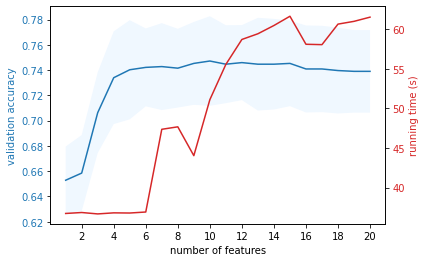

In [70]:
mean = df_rw_rfe.describe().loc["mean"]
x = range(20,0,-1)

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('number of features')
ax1.set_ylabel('validation accuracy', color=color)

ax1.plot(x, df_rw_rfe.describe().loc["mean"])
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

plt.xticks(range(20,0,-2))

color = 'tab:red'
ax2.set_ylabel('running time (s)', color=color)
ax2.plot(x, running_time_list, color=color)
ax2.tick_params(axis='y', labelcolor=color)


ax1.fill_between(x, df_rw_rfe.describe().loc["mean"] - df_rw_rfe.describe().loc["std"], df_rw_rfe.describe().loc["mean"] + df_rw_rfe.describe().loc["std"], facecolor='#F0F8FF', alpha=1.0)

plt.show()

Our proposed model for red wine data is when alpha = 1/n, epsilon = 0.000001, X_train = X_t - X_indices of  [19, 16, 3, 7, 0, 17, 11, 8, 2, 18, 13, 4, 1, 12]

In [ ]:
model = Logistic_Regression_Model()
scores = []

del_i = [19, 16, 3, 7, 0, 17, 11, 8, 2, 18, 13, 4, 1, 12]

for i in range(10):

   X_train_set, X_val_set = seperate(10, i, np_rw)

   X_train = X_train_set[:,:-1]

   Y_train = X_train_set[:,-1]
   X_val = X_val_set[:,:-1]
   Y_val = X_val_set[:,-1]

   X_train = np.delete(X_train, del_i, 1)
   X_val = np.delete(X_val, del_i, 1)

   model.fit(X_train, Y_train, alpha_k=1/X_train.shape[0], epsilon=0.000001, verbose=True)
   
   train_predicted = model.predict(X_train)
   val_predicted = model.predict(X_val)

   training_accuracy = Accu_eval(Y_train, train_predicted)
   validation_accuracy = Accu_eval(Y_val, val_predicted)
   scores.append((training_accuracy, validation_accuracy))

In [72]:
unzipped_scores = np.array(list(zip(*scores)))

In [73]:
print("10 fold-cross training accuracy: " + str(unzipped_scores[0].mean()))
print("10 fold-cross validation accuracy: " + str(unzipped_scores[1].mean()))

print("10 fold-cross training std: " + str(unzipped_scores[0].std()))
print("10 fold-cross validation std: " + str(unzipped_scores[1].std()))

10 fold-cross training accuracy: 0.7471527777777778
10 fold-cross validation accuracy: 0.7427672955974842
10 fold-cross training std: 0.0020937240877335114
10 fold-cross validation std: 0.03137728222205392
